In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plm
import matplotlib.pyplot as plt

# User Test

## Violin plot tempi esecuzione

In [257]:
ris_user_test = pd.read_csv('ris_user_test.csv')
ris_user_test.head()

,Domanda,Tempo_esecuzione(s),Esito,Note
0,1,177,1,NaN
1,2,60,1,NaN
2,1,190,1,NaN
3,2,26,1,NaN
4,1,166,1,NaN


In [258]:
domanda_1 = ris_user_test[ris_user_test['Domanda'] == 1]
domanda_2 = ris_user_test[ris_user_test['Domanda'] == 2]

### Primo task

In [259]:
nostri_tempi_1 = [177,140,201,195,170,178, 140,151,170,145,165,180]

167.66666666666666
19.46078678322699
188.23076923076923
18.03587451200622


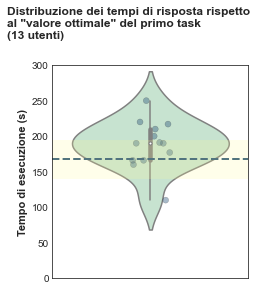

In [260]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(3.5)

sns.violinplot(data=domanda_1, y='Tempo_esecuzione(s)',\
                   #width = 1, \
                    linewidth=1.5, \
                    color = '#c3e7cf', \
                    #cut = 0, \
                    alpha = 0.4, \
                    ax = ax)


#Sovrapposizione strip plots, con colore dei punti dipendente dal valore di umidità media
stripplot = sns.stripplot(data=domanda_1, y='Tempo_esecuzione(s)',\
                      color = "#275379", \
                      alpha = 0.4, \
                      linewidth = 0.4, \
                      s = 6,
                      zorder = 1,
                      ax = ax)

#Personalizzazione degli assi (nomi e ticks)
ax.tick_params(length=0)
ax.set_ylim(0,300)
y_label = "Tempo di esecuzione (s)"
ax.set_ylabel(y_label, size=11, weight="bold")

#Inserimento del titolo
titolo = "Distribuzione dei tempi di risposta rispetto\nal \"valore ottimale\" del primo task\n(13 utenti)"
fig.suptitle(
    titolo,
    x = 0,
    y = 1,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True
)

# linea e banda riferimento (tempi giusti)
media = np.mean(nostri_tempi_1)
std = np.std(nostri_tempi_1)
ax.axhline(media, lw = 2, color='#275379', ls = '--')
ax.axhline(media, lw = std*2, alpha = 0.2, color = '#fffb96')

fig.savefig("ut_violin_primo.png", dpi=150, bbox_inches='tight')

print(media)
print(std)

z=1.96
print(np.mean(domanda_1['Tempo_esecuzione(s)']))
print(z*np.std(domanda_1['Tempo_esecuzione(s)'])/(len(domanda_1))**(1/2))

### Secondo task

In [261]:
nostri_tempi_2 = [18,20,50,23,29,13,22,30,42,23,19,70]

29.916666666666668
15.708057026747628
59.0
27.107452369496055


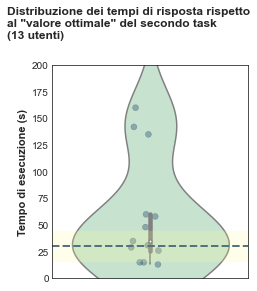

In [262]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(3.5)

sns.violinplot(data=domanda_2, y='Tempo_esecuzione(s)',\
                   #width = 1, \
                    linewidth=1.5, \
                    color = '#c3e7cf', \
                    #cut = 0, \
                    alpha = 0.4, \
                    ax = ax)


#Sovrapposizione strip plots, con colore dei punti dipendente dal valore di umidità media
stripplot = sns.stripplot(data=domanda_2, y='Tempo_esecuzione(s)',\
                      color = "#275379", \
                      alpha = 0.4, \
                      linewidth = 0.4, \
                      s = 6,
                      zorder = 1,
                      ax = ax)

#Personalizzazione degli assi (nomi e ticks)
ax.tick_params(length=0)
ax.set_ylim(0,200)
y_label = "Tempo di esecuzione (s)"
ax.set_ylabel(y_label, size=11, weight="bold")

#Inserimento del titolo
titolo = "Distribuzione dei tempi di risposta rispetto\nal \"valore ottimale\" del secondo task\n(13 utenti)"
fig.suptitle(
    titolo,
    x = 0,
    y = 1,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True
)

# linea e banda riferimento (tempi giusti)
media = np.mean(nostri_tempi_2)
std = np.std(nostri_tempi_2)
ax.axhline(media, lw = 2, color='#275379', ls = '--')
ax.axhline(media, lw = std*2, alpha = 0.2, color = '#fffb96')

fig.savefig("ut_violin_secondo.png", dpi=150, bbox_inches='tight')

print(media)
print(std)

z=1.96
print(np.mean(domanda_2['Tempo_esecuzione(s)']))
print(z*np.std(domanda_2['Tempo_esecuzione(s)'])/(len(domanda_1))**(1/2))

## Stacked bar chart esito

In [263]:
percent_domande = ris_user_test.groupby('Domanda')['Esito'].agg([lambda x: int(sum(x == 1)/len(x)*100), lambda x: int(sum(x==0)/len(x)*100), lambda x: z*(int(sum(x<=3)/len(x)*100) * int(sum(x>3)/len(x)*100) / len(x))**(1/2)]).reset_index()
percent_domande.columns = ['Domanda', 'Esito positivo', 'Esito negativo', 'IC']
percent_domande

,Domanda,Esito positivo,Esito negativo,IC
0,1,100,0,0.0
1,2,100,0,0.0


In [264]:
percent_dom_1 = [percent_domande['Esito positivo'][0], percent_domande['Esito negativo'][0]]
percent_dom_2 = [percent_domande['Esito positivo'][1], percent_domande['Esito negativo'][1]]

### Primo task

C:\Users\gianl\AppData\Local\Temp/ipykernel_10180/2217087475.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.savefig("ut_bar_primo.png", dpi=150, bbox_inches='tight')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


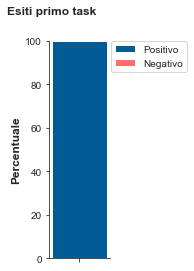

In [265]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(1.1)
plt.ylim(0, 100)


#Primo task
ax.bar('Primo task',\
       percent_dom_1[0],\
       #width,\
       yerr=percent_domande['IC'][0],\
       color = '#005b96',\
       label='Positivo',\
      )
ax.bar('Primo task',\
       percent_dom_1[1],\
       color = '#ff6f69',\
       bottom=percent_dom_1[0],\
       label='Negativo',\
      )

#legenda e label
ax.set_ylabel('Percentuale', size=12, weight="bold")
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#sistemo assi
ax.set(xticklabels=[])
sns.despine()


#Inserimento del titolo
titolo = "Esiti primo task"
fig.suptitle(
    titolo,
    x = -0.4,
    y = 1,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True
)

fig.savefig("ut_bar_primo.png", dpi=150, bbox_inches='tight')

### Secondo task

C:\Users\gianl\AppData\Local\Temp/ipykernel_10180/2870002759.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.savefig("ut_bar_secondo.png", dpi=150, bbox_inches='tight')


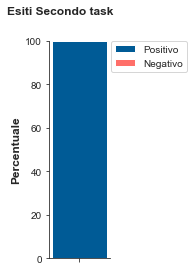

In [266]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(1.1)
plt.ylim(0, 100)


#Primo task
ax.bar('Primo task',\
       percent_dom_2[0],\
       #width,\
       yerr=percent_domande['IC'][1],\
       color = '#005b96',\
       label='Positivo',\
      )
ax.bar('Primo task',\
       percent_dom_2[1],\
       color = '#ff6f69',\
       bottom=percent_dom_2[0],\
       label='Negativo',\
      )

#legenda e label
ax.set_ylabel('Percentuale', size=12, weight="bold")
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#sistemo assi
ax.set(xticklabels=[])
sns.despine()


#Inserimento del titolo
titolo = "Esiti Secondo task"
fig.suptitle(
    titolo,
    x = -0.4,
    y = 1,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True
)

fig.savefig("ut_bar_secondo.png", dpi=150, bbox_inches='tight')

## Questionario psicometrico

In [267]:
ris_questionario_dataviz = pd.read_csv('ris_questionario_dataviz.csv')

In [268]:
ris_questionario_dataviz.columns = ['Data', 'Utile', 'Chiara', 'Informativa', 'Bella', 'Valore complessivo', 'Note']
print(ris_questionario_dataviz.shape)
ris_questionario_dataviz.head()

(28, 7)


,Data,Utile,Chiara,Informativa,Bella,Valore complessivo,Note
0,2022/01/30 2:14:06 PM CET,6,5,6,6,6,NaN
1,2022/01/30 3:36:58 PM CET,5,6,6,6,6,NaN
2,2022/01/30 4:48:08 PM CET,4,5,6,5,5,NaN
3,2022/01/30 5:00:49 PM CET,5,5,6,5,5,NaN
4,2022/01/30 6:05:22 PM CET,5,3,6,6,6,NaN


In [269]:
ris_melt = ris_questionario_dataviz.melt(id_vars=['Data', 'Note'], var_name="Aggettivo", value_name="Voto").sort_values('Aggettivo')
ris_melt.head()

,Data,Note,Aggettivo,Voto
84,2022/01/30 2:14:06 PM CET,NaN,Bella,6
85,2022/01/30 3:36:58 PM CET,NaN,Bella,6
86,2022/01/30 4:48:08 PM CET,NaN,Bella,5
87,2022/01/30 5:00:49 PM CET,NaN,Bella,5
88,2022/01/30 6:05:22 PM CET,NaN,Bella,6


In [270]:
#parmametro ic
z = 1.96

percent_2_gruppi = ris_melt.groupby('Aggettivo')['Voto'].agg([lambda x: sum(x<=3)/len(x)*100, lambda x: sum(x>3)/len(x)*100, lambda x: z*(int(sum(x<=3)/len(x)*100) * int(sum(x>3)/len(x)*100) / len(x))**(1/2)]).reset_index()
percent_2_gruppi.columns = ['Aggettivo', 'Voti 1-3', 'Voti 4-6', 'IC']
percent_2_gruppi

,Aggettivo,Voti 1-3,Voti 4-6,IC
0,Bella,0.000000,100.000000,0.00000
1,Chiara,7.142857,92.857143,9.39983
2,Informativa,0.000000,100.000000,0.00000
3,Utile,0.000000,100.000000,0.00000
4,Valore complessivo,0.000000,100.000000,0.00000


### Stacked bar chart

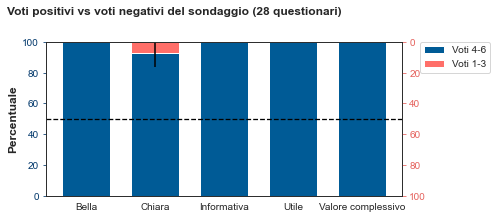

In [271]:
sns.set_style('white')

fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(7)
plt.ylim(0, 100)
ax2 = ax.twinx()
ax2.set_ylim(100, 0)

ax.tick_params(axis='y', colors='#03396c')
ax2.tick_params(axis='y', colors='#e5635e')


#Bar plot
ax.bar(percent_2_gruppi['Aggettivo'],\
       percent_2_gruppi['Voti 4-6'],\
       yerr=percent_2_gruppi['IC'],\
       width = 0.7,\
       color = '#005b96',\
       label='Voti 4-6',\
      )

ax.bar(percent_2_gruppi['Aggettivo'],\
       percent_2_gruppi['Voti 1-3'],\
       width = 0.7,\
       color = '#ff6f69',\
       bottom=percent_2_gruppi['Voti 4-6'],\
       label='Voti 1-3',\
      )

#legenda e label
ax.set_ylabel('Percentuale', size=12, weight="bold")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#sistemo assi
#sns.despine()


#Inserimento del titolo
titolo = "Voti positivi vs voti negativi del sondaggio (28 questionari)"
fig.suptitle(
    titolo,
    x = 0.02,
    y = 1,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True
)
ax.axhline(50, lw = 1.3, color='k', ls = '--')

fig.savefig("qp_barchart.png", dpi=150, bbox_inches='tight')

### Grafico correlazioni

In [272]:
corr = ris_questionario_dataviz[['Utile', 'Chiara', 'Informativa', 'Bella', 'Valore complessivo']].corr()
corr.columns = ['Utile', 'Chiara', 'Informativa', 'Bella', 'Valore\ncomplessivo']
corr.index = ['Utile', 'Chiara', 'Informativa', 'Bella', 'Valore\ncomplessivo']

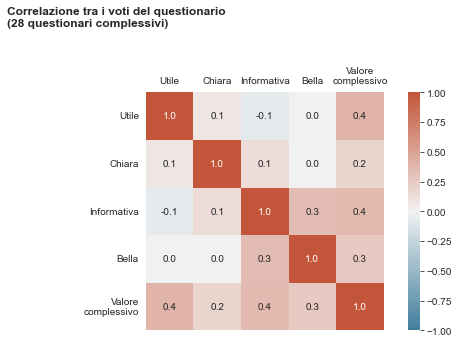

In [273]:
import numpy as np
import textwrap

fig, ax = plt.subplots()

fig.set_figheight(4.5)
sns.heatmap(corr,\
            square = True,\
            annot=True,\
            fmt='.1f',\
            #mask = np.triu(np.ones_like(corr, dtype=bool)),\
            cmap = sns.diverging_palette(230, 20, as_cmap=True),\
            ax = ax,\
            vmin = -1,\
            vmax = 1,\
           )

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

#Inserimento del titolo
titolo = "Correlazione tra i voti del questionario\n(28 questionari complessivi)"
fig.suptitle(
    titolo,
    x = 0.04,
    y = 1.05,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True)

plt.yticks(rotation=0)

fig.savefig("qp_correlazioni.png", dpi=150, bbox_inches='tight')

### Violin plot o Farfalla

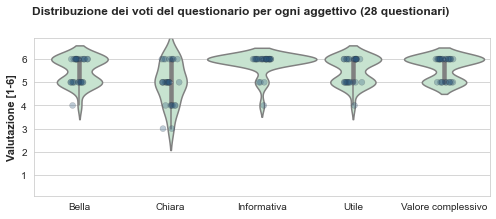

In [274]:
sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(7)

sns.violinplot(data=ris_melt,\
                    y='Voto',\
                    x='Aggettivo',\
                    width = 1.2, \
                    #linewidth=1, \
                    color = '#c3e7cf', \
                    #cut = 0, \
                    alpha = 0.4,\
                    #order = ['Utile', 'Chiara', 'Informativa', 'Bella', 'Valore\ncomplessivo'],\
                    ax = ax,\
             )


#Sovrapposizione strip plots, con colore dei punti dipendente dal valore di umidità media
stripplot = sns.stripplot(data=ris_melt,\
                      y='Voto',\
                      x='Aggettivo',\
                      color = "#275379", \
                      alpha = 0.3, \
                      linewidth = 0.4, \
                      s = 6,
                      #order = ['Utile', 'Chiara', 'Informativa', 'Bella', 'Valore\ncomplessivo'],\
                      ax = ax)

#Personalizzazione degli assi (nomi e ticks)
#ax.tick_params(length=0)
ax.set_ylim(0.1,6.9)
y_label = "Valutazione [1-6]"
ax.set_ylabel(y_label, size=11, weight="bold")
ax.set(xlabel=None)
#
#Inserimento del titolo
titolo = "Distribuzione dei voti del questionario per ogni aggettivo (28 questionari)"
fig.suptitle(
    titolo,
    x = 0.07,
    y = 1,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True
)

fig.savefig("qp_violin.png", dpi=150, bbox_inches='tight')